In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
#from sklearn.feature_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [5]:
train=pd.read_csv('train.csv',sep=',')
test=pd.read_csv('test.csv',sep=',')

In [6]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [7]:
test.head()     

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States
1,32563,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50.0,United-States
2,32564,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40.0,United-States
3,32565,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40.0,United-States
4,32566,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,30.0,United-States


In [15]:
##print cross-tabulation
c=pd.crosstab(train['Income.Group'],train['Occupation'],margins=True)
c

Occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
Income.Group,,,,,,,,,,,,,,
<=50K,40,1,53,26,10,21,22,52,34,7,49,15,26,356
>50K,8,0,13,32,2,0,5,4,25,4,10,5,1,109
All,48,1,66,58,12,21,27,56,59,11,59,20,27,465


c:\program files\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


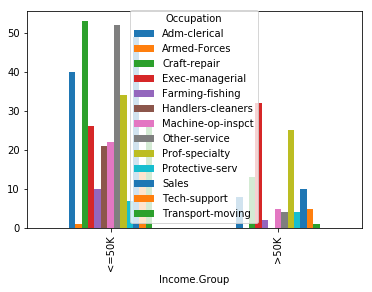

In [65]:
#we can also plot the stacked chart
c.iloc[:-1,:-1].plot(kind='bar',grid='False')

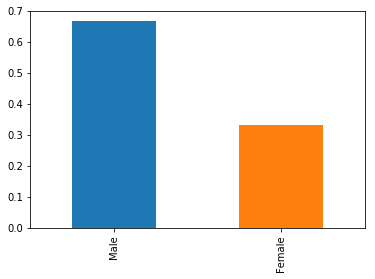

In [45]:
####continuous and continuous

(train['Sex'].value_counts()/train.shape[0]).plot(kind='bar')

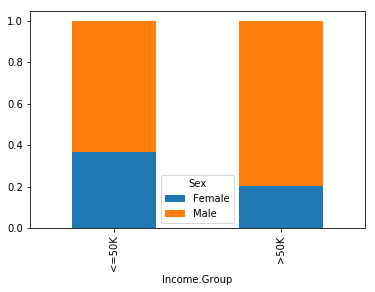

In [46]:
def fan(ser):
    return ser/float(ser[-1])
ct2=c.apply(fan,axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar',stacked=True)

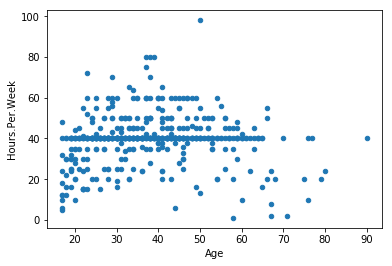

In [47]:
#continuous and continuous
train.plot('Age','Hours.Per.Week',kind='scatter')

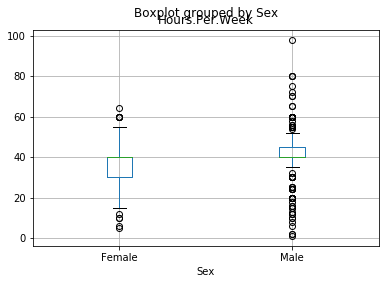

In [49]:
####continuos and categorical
train.boxplot(column='Hours.Per.Week',by='Sex')

In [51]:
train['Sex'].value_counts()/train.shape[0]

Male      0.667339
Female    0.332661
Name: Sex, dtype: float64

In [56]:
kk=pd.crosstab(train['Sex'],train['Income.Group'],margins=True)

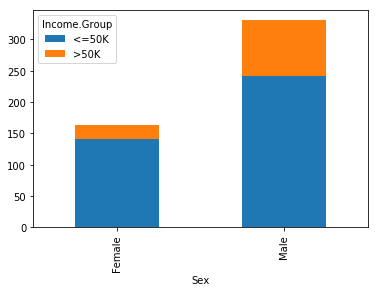

In [57]:
kk.iloc[:-1,:-1].plot(kind='bar',stacked=True)

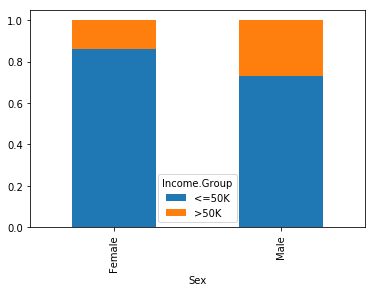

In [61]:
def fun(sar):
    return sar/float(sar[-1])
cct=kk.apply(fun,axis=1)
cct.iloc[:-1,:-1].plot(kind='bar',stacked=True)

In [63]:
train.corr()

,ID,Age,Hours.Per.Week
ID,1.000000,-0.036859,-0.079761
Age,-0.036859,1.000000,0.036790
Hours.Per.Week,-0.079761,0.036790,1.000000
